# Titanic - Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

The main goal of EDA is to gain insights, understand the data structures, distribution, composition and idetify any anamolies or outliers that may require further investigation.

### Importing Data

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
data = train.copy()

In [4]:
print(f"Shape of training set: {train.shape}")
print(f"Shape of testing set: {test.shape}")

Shape of training set: (891, 12)
Shape of testing set: (418, 11)


### Data Cleaning

#### Indentify the data types

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train_numeric = train.select_dtypes(include=['int64', 'float64'])

In [10]:
train_numeric.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

#### Fixing the rows and columns

In [11]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [12]:
train = train.drop(['Name', 'Ticket'], axis=1)

In [13]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [14]:
train = train.rename(columns= {'Pclass': 'TicketClass', 'SibSp': 'SiblingsSpouses', 'Parch': 'ParentsChildrens'})

In [15]:
train.head()

PassengerId  Survived  TicketClass     Sex   Age  SiblingsSpouses  \
0            1         0            3    male  22.0                1   
1            2         1            1  female  38.0                1   
2            3         1            3  female  26.0                0   
3            4         1            1  female  35.0                1   
4            5         0            3    male  35.0                0   

   ParentsChildrens     Fare Cabin Embarked  
0                 0   7.2500   NaN        S  
1                 0  71.2833   C85        C  
2                 0   7.9250   NaN        S  
3                 0  53.1000  C123        S  
4                 0   8.0500   NaN        S

#### Identify and handle missing values

In [16]:
train.isnull().sum()

PassengerId           0
Survived              0
TicketClass           0
Sex                   0
Age                 177
SiblingsSpouses       0
ParentsChildrens      0
Fare                  0
Cabin               687
Embarked              2
dtype: int64

**Cabin**

In [17]:
# Percentage of missing value in 'Cabin' column
print(train.isnull().sum()['Cabin']/train.shape[0])

0.7710437710437711


The total percentage of the missing value in 'Cabin' column is too high. So we will delete this column.

In [18]:
train.drop('Cabin', axis=1, inplace=True)

**Age**

In [19]:
# Percentage of missing value in 'Age' column
print(train.isnull().sum()['Age']/train.shape[0])

0.19865319865319866


In [20]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

**Embarked**

In [21]:
# Percentage of missing value in 'Embarked' column
print(train.isnull().sum()['Embarked']/train.shape[0])

0.002244668911335578


The percentage of the missing value of 'Embarked' is very low. So, we will drop the rows containing the missing values.

In [22]:
train.dropna(subset=['Embarked'], inplace=True)

In [23]:
train.isnull().sum()

PassengerId         0
Survived            0
TicketClass         0
Sex                 0
Age                 0
SiblingsSpouses     0
ParentsChildrens    0
Fare                0
Embarked            0
dtype: int64

#### Handling outliers

In [24]:
train.head()

PassengerId  Survived  TicketClass     Sex   Age  SiblingsSpouses  \
0            1         0            3    male  22.0                1   
1            2         1            1  female  38.0                1   
2            3         1            3  female  26.0                0   
3            4         1            1  female  35.0                1   
4            5         0            3    male  35.0                0   

   ParentsChildrens     Fare Embarked  
0                 0   7.2500        S  
1                 0  71.2833        C  
2                 0   7.9250        S  
3                 0  53.1000        S  
4                 0   8.0500        S

**Fare**

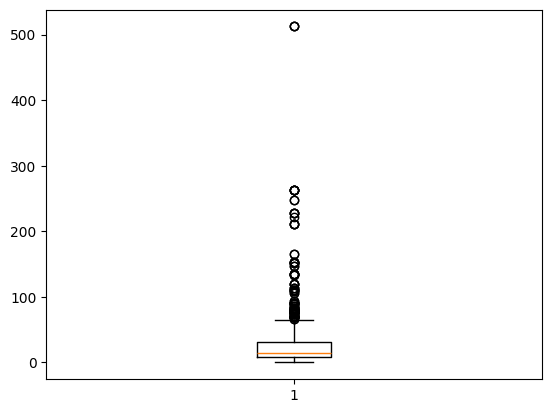

In [25]:
plt.boxplot(train.Fare)
plt.show()

In [26]:
train[train.Fare>300]

PassengerId  Survived  TicketClass     Sex   Age  SiblingsSpouses  \
258          259         1            1  female  35.0                0   
679          680         1            1    male  36.0                0   
737          738         1            1    male  35.0                0   

     ParentsChildrens      Fare Embarked  
258                 0  512.3292        C  
679                 1  512.3292        C  
737                 0  512.3292        C

There are only three passengers who's fare is greater than 300. These are clearly an outliers. So we will drop these rows.

In [27]:
train = train[train.Fare<300]

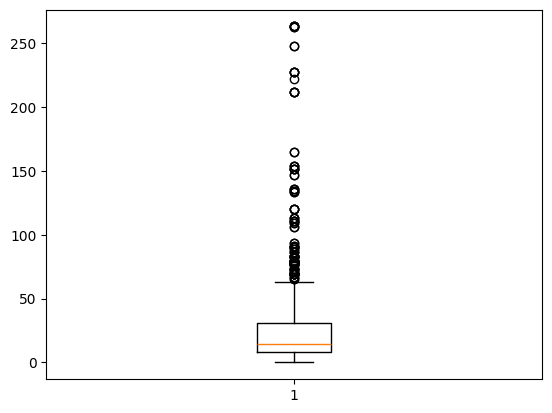

In [28]:
plt.boxplot(train.Fare)
plt.show()

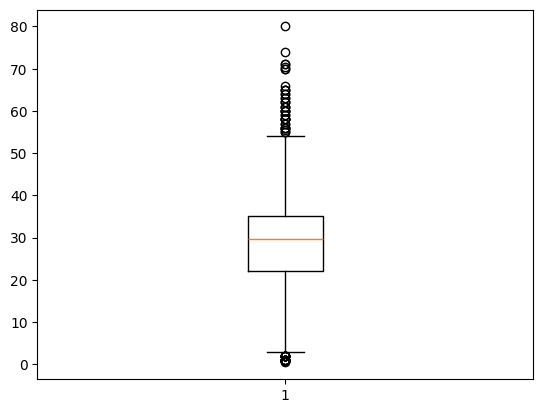

In [29]:
plt.boxplot(train.Age)
plt.show()

### Data Analysis

#### Univariate Analysis

In [30]:
train.nunique().sort_values()

Survived              2
Sex                   2
TicketClass           3
Embarked              3
SiblingsSpouses       7
ParentsChildrens      7
Age                  89
Fare                246
PassengerId         886
dtype: int64

In [31]:
uv = ["Survived", "Sex", "TicketClass", "Embarked", "SiblingsSpouses", "ParentsChildrens"]

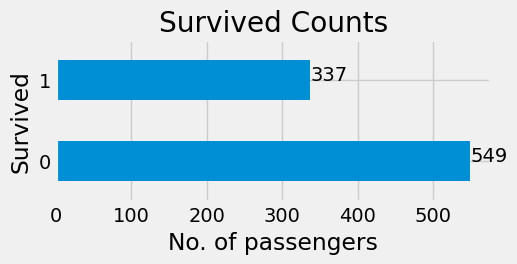

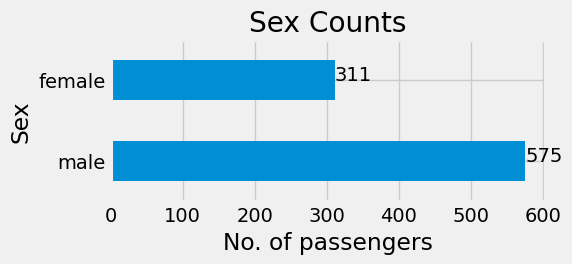

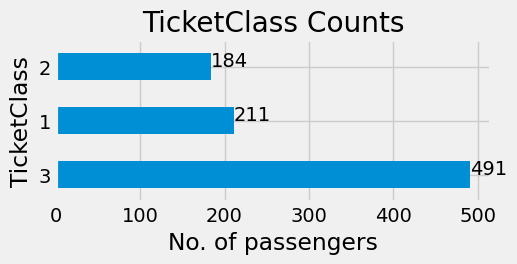

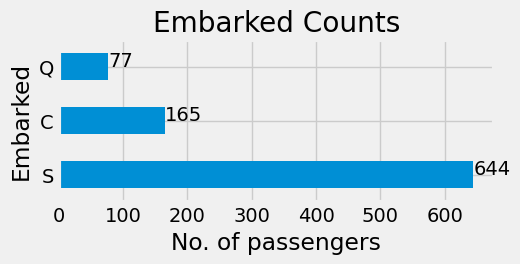

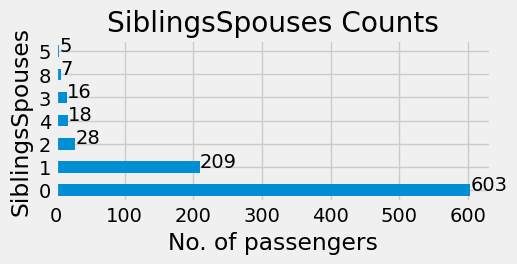

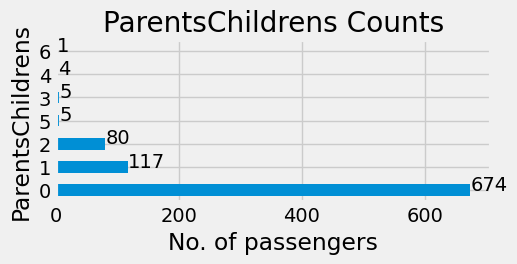

In [32]:
plt.style.use('fivethirtyeight')
def hbar(d):
    counts = train[d].value_counts()
    fig = plt.figure(figsize=(5, 2))
    ax = counts.plot(kind="barh")
    for i,v in enumerate(counts):
        ax.text(v + 0.1, i, str(v))
    plt.title(f"{d} Counts")
    plt.xlabel("No. of passengers")
    plt.ylabel(d)
    plt.show()
    
for v in uv:
    hbar(v)

<Axes: xlabel='Age', ylabel='Count'>

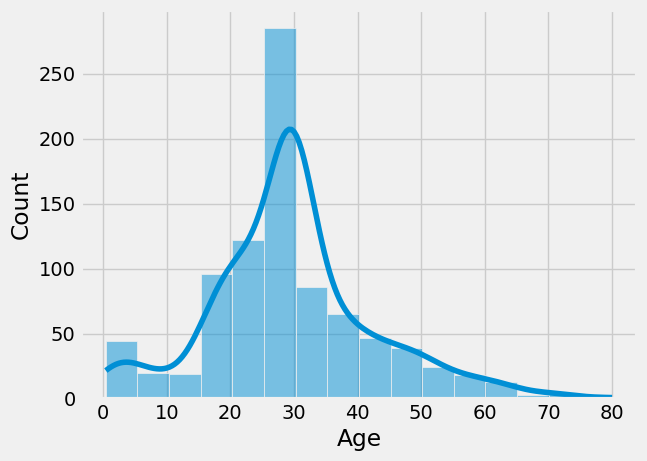

In [33]:
sns.histplot(data=train, x="Age", binwidth=5, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

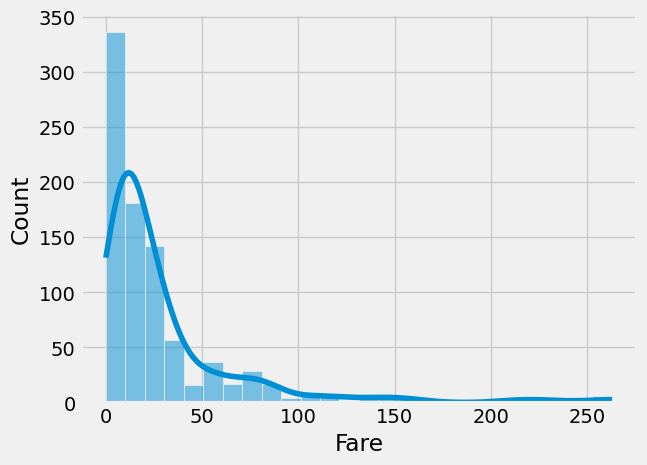

In [34]:
sns.histplot(data=train, x="Fare", binwidth=10, kde=True)

#### Bivariate Analysis

In [35]:
train.head()

PassengerId  Survived  TicketClass     Sex   Age  SiblingsSpouses  \
0            1         0            3    male  22.0                1   
1            2         1            1  female  38.0                1   
2            3         1            3  female  26.0                0   
3            4         1            1  female  35.0                1   
4            5         0            3    male  35.0                0   

   ParentsChildrens     Fare Embarked  
0                 0   7.2500        S  
1                 0  71.2833        C  
2                 0   7.9250        S  
3                 0  53.1000        S  
4                 0   8.0500        S

##### Fare Vs Survived

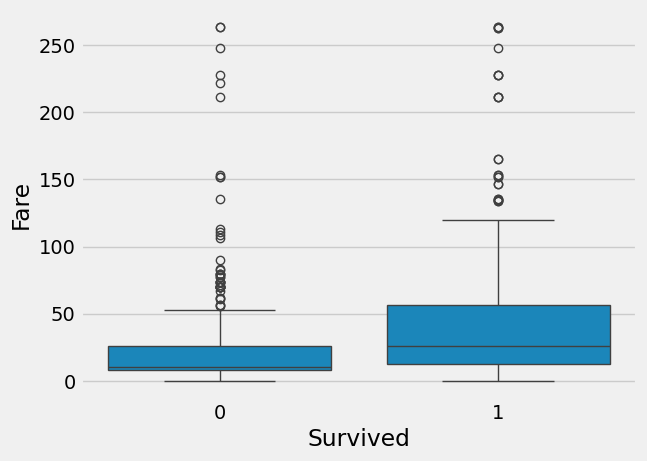

In [36]:
sns.boxplot(data=train, x='Survived', y='Fare')
plt.show()

##### Age Vs Survived

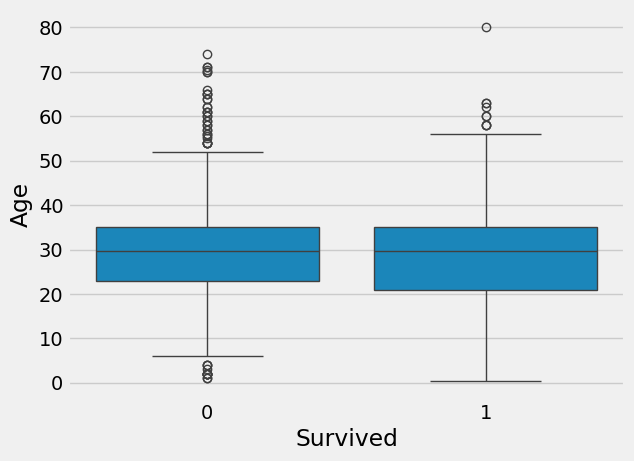

In [37]:
sns.boxplot(data=train, x='Survived', y='Age')
plt.show()

##### Sex Vs Survived

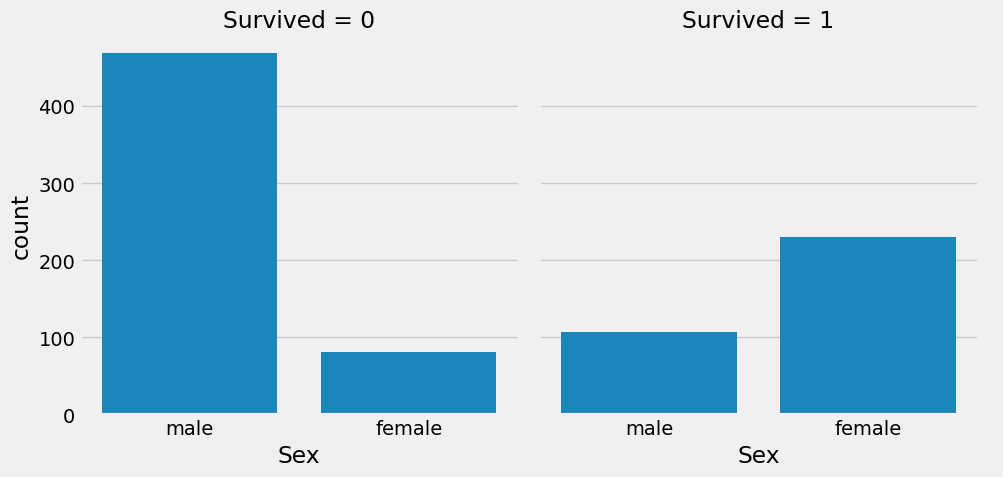

In [38]:
sns.catplot(x="Sex", col="Survived", data=train, kind="count")
plt.show()

##### TicketClass vs Survived

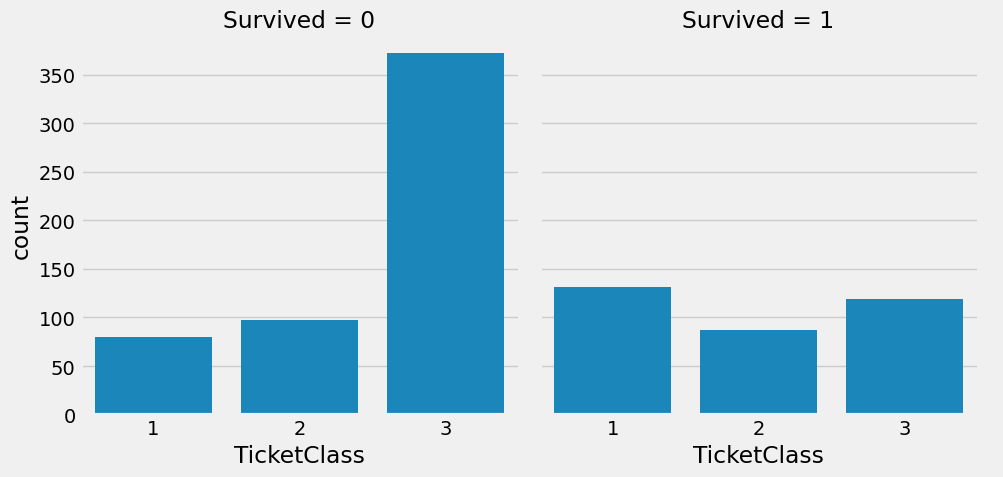

In [39]:
sns.catplot(x="TicketClass", col="Survived", data=train, kind="count")
plt.show()

##### Embarked Vs Survived

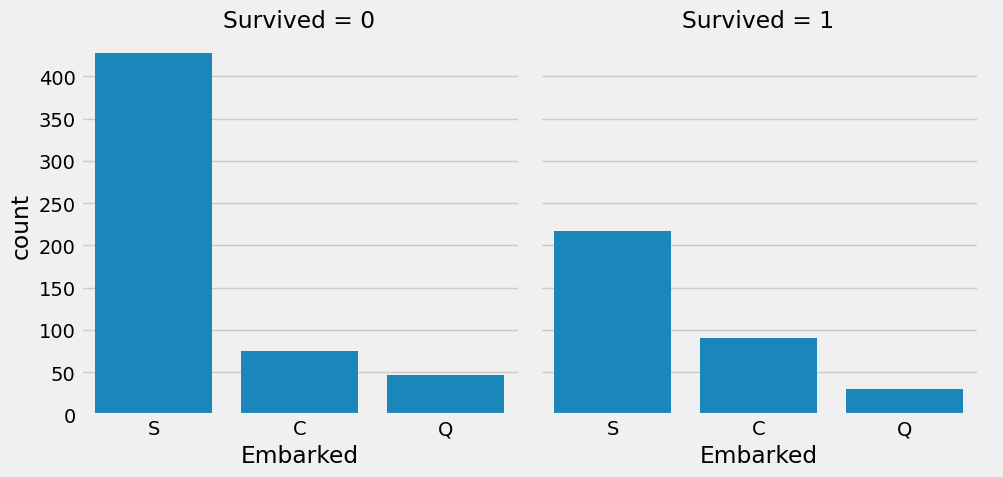

In [40]:
sns.catplot(x="Embarked", col="Survived", data=train, kind="count")
plt.show()

In [41]:
from ydata_profiling import ProfileReport

In [42]:
data.drop('PassengerId', axis=1, inplace=True)

In [43]:
profile = ProfileReport(data, title="Titanic Dataset Profiling Report", explorative=True)

In [44]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]